# OLS Regression

In [2]:
import math
#import eikon as ek
import numpy as np
import pandas as pd
from pylab import plt
# print(plt.style.available)
plt.style.use('seaborn-v0_8')
import cufflinks as cf
cf.set_config_file(offline=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

## 1. 1D Example

First we generate some data mimicking "real world" data with a linear relationship.

In [3]:
x = np.linspace(0, 5, 100)
y = 2 + 0.5 * x + np.random.standard_normal(len(x)) * 0.15

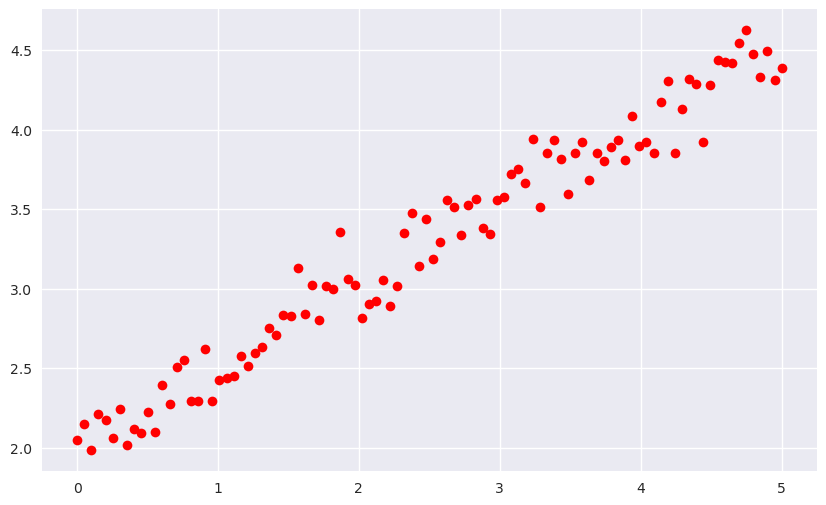

In [4]:
plt.figure(figsize=(10, 6))
plt. plot(x, y, 'ro')

In [5]:
cov = np.cov(x, y)[0, 1]

In [6]:
beta = cov / x.var()

In [7]:
alpha = y.mean() - beta * x.mean()

By printing `alpha` and `beta`, we can compare with our generating function.

In [8]:
alpha, beta

(1.99797238025097, 0.5108112350240662)

Now we can visualise our OLS fit.

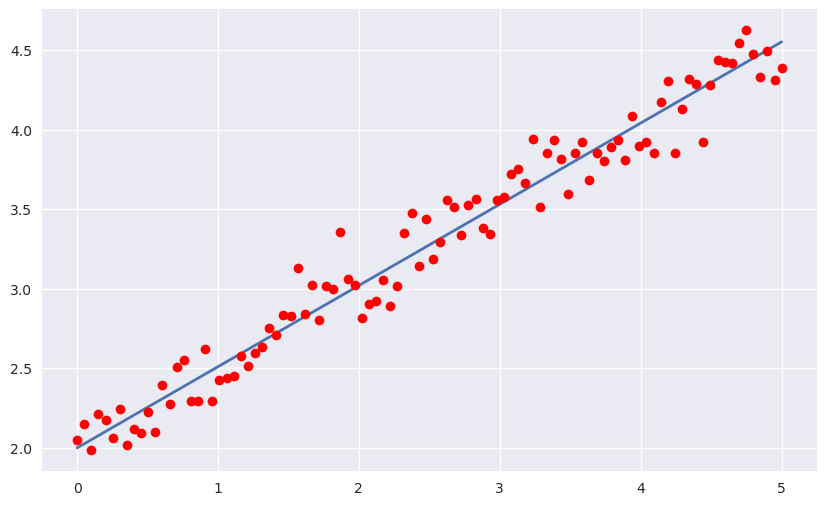

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x, alpha + beta *  x, lw=2.0)
plt.plot(x, y, 'ro'); 

## Checking the Residuals

The residuals contain useful information. The residuals of a model are the differences between the observed and predicted values. They provide information about the variance of the errors across different levels of the independent variables. In particular, they are useful for checking the validity of the assumptions of OLS:

1. **linearity**: the model is linear in its parameters (coefficients and error term)
2. **independence**: independent variables should not be prefectly correlated with each other (no multicolinearity)
3. **zero mean**: the mean of the residuals should be zero
4. **no correlation**: residuals should not be correlated with the independent variables
5. **homoscedasticity**: the standard deviation of the residuals should be constant
6. **no autocorrelation**: the residuals should not be correlated with each other

Check:

1. **linearity**: given
2. **independence**: This is automatically satisfied, since there is only one independent variable.
3. **zero mean**: mean zero given (see below)
4. **no correlation**: correlation of zero (see below)
5. **homoscedasticity**: given (see below)
6. **no autocorrelation**: given (see below)

In [10]:
# r = residuals
r = alpha + beta * x - y

### Zero-mean Check

In [11]:
print(f"Zero mean check: {r.mean()}")

Zero mean check: 2.9753977059954197e-16


### No correlation check

To check the correlation, we can printing the correlation matrix of the residuals with the independent variable:

In [12]:
np.corrcoef(r, x)

array([[1.        , 0.05194563],
       [0.05194563, 1.        ]])

### Homoscedasticity Check

The Bartlett test is used to test if k samples are from populations with equal variances, which is an assumption in various statistical tests like ANOVA and regression analysis. This property is known as homoscedasticity.

It is important to remember that the Bartlett test is to be run on the residuals, not the raw values.

In [13]:
from scipy.stats import bartlett

split = int(len(x) / 2)
bartlett(r[:split], r[split:])

BartlettResult(statistic=0.002978378495259502, pvalue=0.9564774366793705)

In the Bartlett test, the null hypothesis is that the data is homooscedastic. Since the p-value is high, this implies we should not reject the null hypothesis,

The statistic value is very low, indicating that the sample variances are very similar to each other.

### Autocorrelation Check

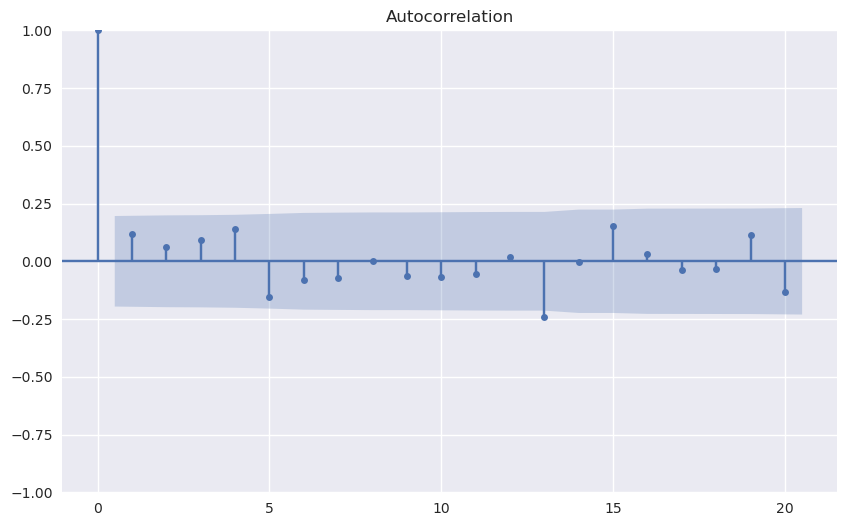

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 6))

plot_acf(r, ax=ax);

# Monomial Regression

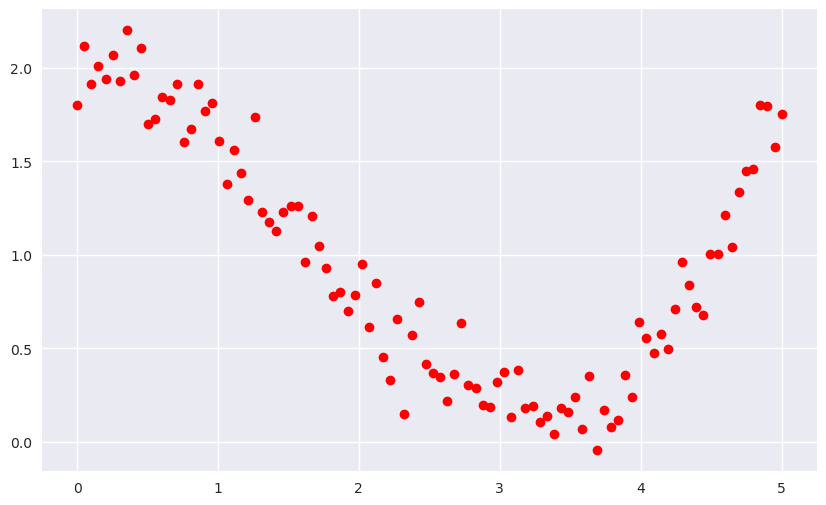

In [17]:
x = np. linspace(0, 5, 100)
y = 2 - 0.5 * x ** 2 + 0.1 * x ** 3 + np.random.standard_normal(len(x)) * 0.15
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

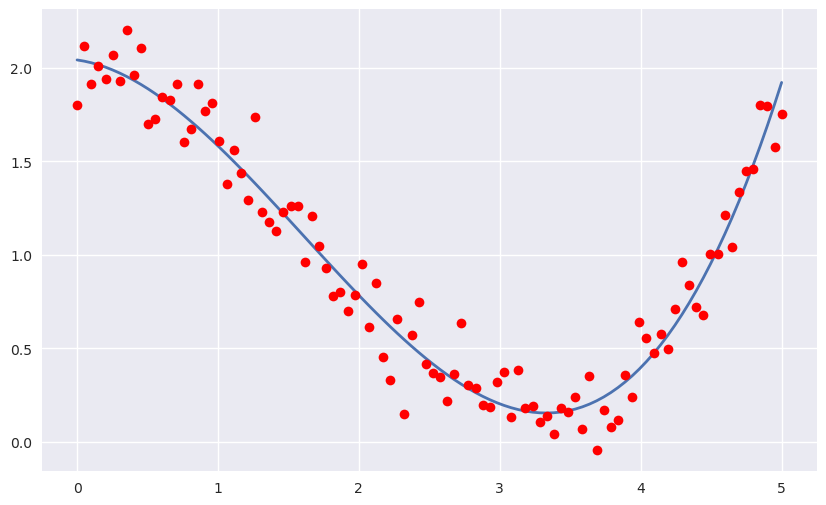

In [18]:
reg = np.polyfit(x, y, 3)

plt.figure(figsize=(10, 6))
plt. plot(x, np. polyval(reg, x), lw=2.0)
plt. plot(x, y, 'ro')

Let us again check for the assumptions:

* **linearity**: given
* **independence**: given
* **zero mean**: mean zero given (see below)
* **no correlation**: correlation of zero (see below)
* **homoscedasticity**: given (see below)
* **no autocorrelation**: given (see below)

In [19]:
r = np. polyval(reg, x) - y

## Zero-mean

In [20]:
r.mean()

-5.073719222536966e-16

## No Correlation

In [21]:
np.corrcoef(r, x)

array([[1.00000000e+00, 1.13267547e-14],
       [1.13267547e-14, 1.00000000e+00]])

## Heteroscedasticity

In [22]:
split = int(len(x) / 2)
bartlett(r[:split], r[split:])

BartlettResult(statistic=1.191184940663575, pvalue=0.27509066997627873)

## No Autocorrelation

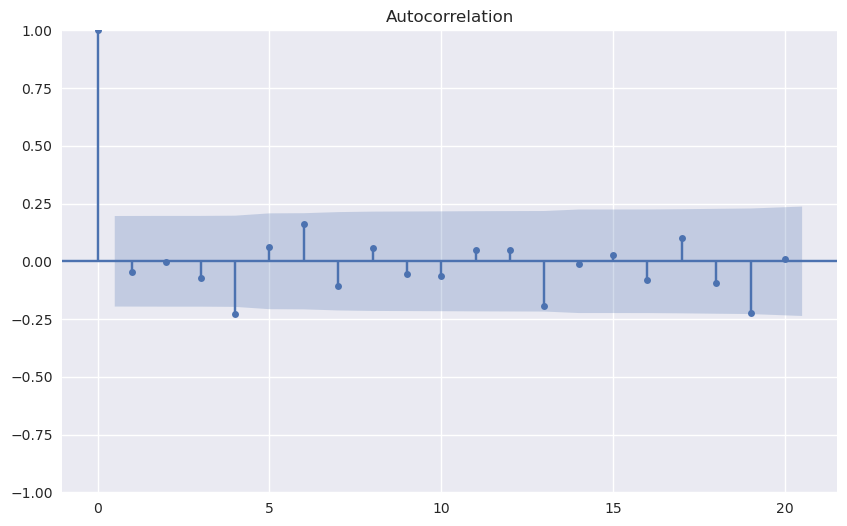

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(r, ax=ax);

## Multivariate Regression

In [24]:
x1 = np.random.random(200) * 5
x2 = np.random.random(200) * 5
y = 2 - 0.5 * x1 ** 2 + 0.1 * x2 ** 3 + np.random.standard_normal(len(x1)) * 0.15

In [25]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'text': '', 'categories': ''})
df.iplot(kind='scatter3d', x='x1', y='x2', z='y', text='text', categories='categories', size=4)

## OLS with Categorical Variables

Including categorical variables can be a powerful way to increase the accuracy of a multivariate linear regression model.

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Plotting sepal length against petal length shows a clear trend.

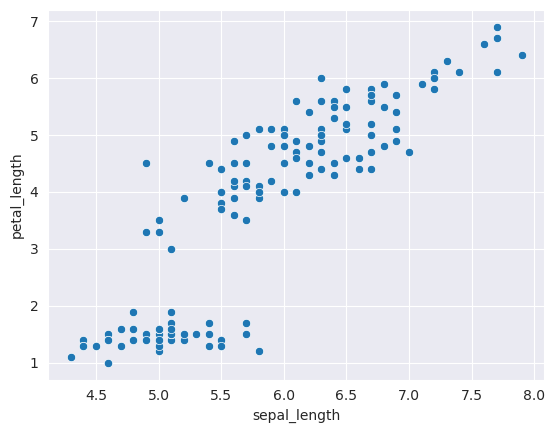

In [3]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x=iris.sepal_length, y=iris.petal_length)

However a more informative picture emerges when different colours are used to distinguish datapoints by species.

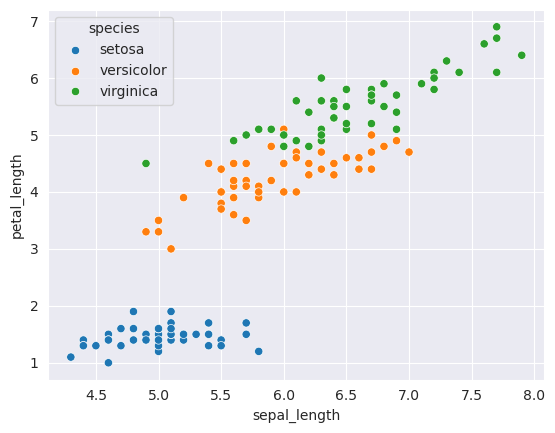

In [4]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

A categorical variable such as species can be included in a linear regression using one-hot encoding, which can be achieved with the pandas `get_dummies` method.

In [5]:
import pandas as pd
dummy = pd.get_dummies(iris.species, dtype='int')
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


A matrix of independent variables `X` can now be formed using both `pd.concat` and `sm.add_constant`.

In [6]:
# Dependent variable
import statsmodels.api as sm
y = iris.petal_length

# Independent variables
# virginia is included as a "baseline" where, setosa and versicolor are both 0
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


Now the above dataframe can be used with statsmodels to perform a multivariate linear regression.

In [7]:
model = sm.OLS(y, X)
result = model. fit()
result. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          1.46e-116
Time:                        05:55:38   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the result above we see a $R^2$ value of 0.975, i.e.97.5% of the variance in petal length is explained by the predictors.

As in our scatter plot, we can view the categorical dimension of our multivariate regression can be visualised in 2d by assigning each species to a colour, leading to 3 line plots.

In [8]:
beta = result.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

/tmp/ipykernel_106775/2438216376.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vi_yline = beta[0] + beta[1]*xline
/tmp/ipykernel_106775/2438216376.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_yline = beta[0] + beta[1]*xline + beta[2]
/tmp/ipykernel_106775/2438216376.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ve_yline = beta[0] + beta[1]*xline + beta[3]


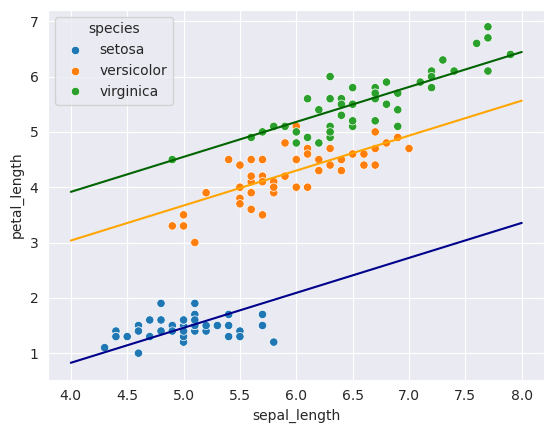

In [11]:
import numpy as np
import matplotlib.pyplot as plt

xline = np.linspace(4, 8, 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

# Econometrics

## Estimators

Econometricians try to find estimators that have desirable statistical properties, including:
- Unbiasedness
  - An estimator is unbiased if its expected value is the true value of the parameter
- Efficiency
  - The estimator has lower standard error than other unbiased estimators for a given sample size
- Consistency
  - Consistency means, that as the sample size $N \rightarrow \infty$, $\hat{\beta} \rightarrow \beta$.

OLS is often used for estimation, since it provides the "best unbiased estimator" BLUE (where "best" means most efficient), given the Gauss-Markov assumptions.
Other estimation techniques include:
- Maximum likelihood estimation
- Generalized method of moments
- Generalized least squares

# Key Assumptions of OLS

Ordinary Least Squares (OLS) is a method for estimating the parameters in a linear regression model. The goal of OLS is to find the line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed values and the values predicted by the linear model. This method is widely used due to its simplicity and desirable statistical properties under certain conditions.

For the OLS estimators to be unbiased, consistent, and efficient, several key assumptions need to be satisfied:

1. **Linearity**: The relationship between the dependent variable $ y $ and the independent variables $ X $ is linear in the parameters. This means the model can be written as:
   $$ y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_k X_{ik} + \epsilon_i $$
   where $ \beta $ are the parameters to be estimated, and $ \epsilon_i $ is the error term.

2. **Independence**: The observations are independently and identically distributed (i.i.d.). This assumption means that the sample data points are drawn independently from the population.

3. **Homoscedasticity**: The variance of the error terms $ \epsilon_i $ is constant across all levels of the independent variables. Formally, $ \text{Var}(\epsilon_i | X_i) = \sigma^2 $ for all $ i $. When this assumption is violated, we have heteroscedasticity.

4. **No perfect multicollinearity**: The independent variables are not perfectly collinear, meaning that no independent variable can be expressed as an exact linear combination of the other independent variables. If this assumption is violated, it is impossible to separate out individual effects of the collinear variables on the dependent variable.

5. **Exogeneity (includes Zero mean)**: The error term $ \epsilon_i $ has an expected value of zero conditional on the independent variables $ X_i $. This implies that the independent variables are not correlated with the error terms:
   $$ \mathbb{E}(\epsilon_i | X_i) = 0 $$

6. **Normality of errors**: For hypothesis testing and constructing confidence intervals, it is assumed that the error terms are normally distributed:
   $$ \epsilon_i \sim \mathcal{N}(0, \sigma^2) $$
   This assumption is not necessary for the OLS estimators to be unbiased but is required for the validity of hypothesis tests and confidence intervals.

## Tests for each assumption

1. Linearity: Scatter plot
2. Independence (covers no autocorrelation): Durbin-Watson test (`from statsmodels.stats.stattools import durbin_watson`). More visual option is `plot_acf`.
3. Homoscedasticity: Bartlett test (`bartlett(residuals[:split], residuals[split:])`)
4. No perfect multicollinearity: Test variance inflation factor `from statsmodels.stats.outliers_influence import variance_inflation_factor`.
  - The correlation matrix is not the best diagnostic for multicolinearity: for example $x_1 + x_2$ could be highly correlated with $x_3$, while not being correlated individually.
5. Exogeneity (No Correlation): `residuals.mean()`
6. Normality of errors (for inference): Two common plots: plot the residuals and check the shape, and/or make a QQ-plot. For a hypothesis test, use Anderson-Darling test (e.g. `from statsmodels.stats.diagnostic import normal_ad`)

# How to Correct for Violations of the Assumptions of OLS

## Heteroskedasticity

Heteroskedasticity makes estimators **inefficient**: I.e. the confidence intervals will be larger than if the data was homoskedastic.

1. Rethink your model
- See Pure vs. Impure Heteroskedasticity
- A misspecified model will almost always result in heteroscedasticity
- Question whether your dependent variables are capturing all of the systematic effects and all that's left is truly random effects

2. Use Generalized Least Squares (GLS) or more specifically the subset of GLS called Weighted Least Squares (WLS)
- GLS is a technique used to estimate the parameters of a linear regression model when there is a certain degree of correlation between the observations or when the variances of the observations are not equal (heteroscedasticity).
- WLS is a specific approach where each observation is given a weight based on the variance of its error term, with the idea of giving more weight to observations with smaller variances.

3. Common transformations:
- **Logarithm transformation**: If $y$ grows exponentially or as a power of $x$, transform by taking the log
  - Let $y' = \ln(y)$, then use $y'$ as the response
  - For a power law model, use $\ln(x)$ as the regressor too
- **Square root transformation**: applies to data exhibiting a Poisson distribution (variance = mean)
  - Fitting $\hat{y} \propto x^2$ is not the same as fitting $\hat{y}' = \sqrt{\hat{y}} \propto x$
- We can systematize such transformations using the **Box-Cox transformation** approach

### Pure vs. Impure Heteroskedasticity

- Pure heteroscedasticity refers to cases where you specify the correct model and yet you observe non-constant variance in the residual plots.
- Impure heteroscedasticity refers to cases where you incorrectly specify the model, and that causes the non-constant variance. When you leave an important variable out of a model, the omitted effect is absorbed into the error term. If the effect of the omitted variable varies throughout the observed range of data, it can produce the telltale signs of heteroscedasticity in the residual plots.
- When you observe heteroscedasticity in the residual plots, it is important to determine whether you have pure or impure heteroscedasticity because the solutions are different. If you have the impure form, you need to identify the important variable(s) that have been left out of the model and refit the model with those variables. For the remainder of this blog post, I talk about the pure form of heteroscedasticity.

## Multicolinearity

Problems with Multicolinearity
- Adding or deleting predictor variables changes the regression coefficients
- The standard errors of the regression coefficients become large
- The individual regression coefficients may not be significant even if the overall model is significant
- Some regression coefficients may be significantly different than expected (even the wrong sign)


Addressing Multicollinearity:
- Multicolinearity can result from the model itself, or from the data in the samples. Consider predicting body fat percentage based on measures of abdomen circumfurence and chest circumfurence. If there are no data points that are larger in one than the other then these two variables will be highly correlated, however it is not impossible to imagine that there could be some humans who have a large chest and smaller abdomen, which would reduce the collinearity between these two variables.
- Use Ridge Regression
- Principal Component Analysis (PCA)

## Endogeneity

Causes of endogeneity:
- Reverse causality: Changes in the dependent variable change the value of at least one of the covariates
- Omitted variables.
- The covariates are subject to non-random measurement error.

Consequences of endogeneity:
- Leads to biased and inconsistent estimators, i.e. $\mathbb{E}[\hat{\beta}_{OLS}] \neq \beta$.

### Instrumental Variables

Instrumental variable methods allow for consistent estimation when the explanatory variables (covariates) are correlated with the error terms in a regression model.

# OLS Formula

In a simple linear regression model, the relationship between the dependent variable $ y $ and the independent variable $ X $ can be described as:

$$ y_i = \beta_0 + \beta_1 X_i + \epsilon_i $$

where:
- $ y_i $ is the $i$-th observation of the dependent variable.
- $ X_i $ is the $i$-th observation of the independent variable.
- $ \beta_0 $ is the intercept of the regression line.
- $ \beta_1 $ is the slope of the regression line.
- $ \epsilon_i $ is the error term for the $i$-th observation.

The Ordinary Least Squares (OLS) estimator aims to find the values of $ \beta_0 $ and $ \beta_1 $ that minimize the sum of squared residuals. The OLS estimators for $ \beta_0 $ and $ \beta_1 $ are given by the following formulas:

### OLS Estimator for $ \beta_1 $ (Slope)
$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^n (X_i - \bar{X})^2} $$

where:
- $ \hat{\beta}_1 $ is the estimated slope of the regression line.
- $ \bar{X} $ is the mean of the independent variable $ X $.
- $ \bar{y} $ is the mean of the dependent variable $ y $.

### OLS Estimator for $ \beta_0 $ (Intercept)
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{X} $$

where:
- $ \hat{\beta}_0 $ is the estimated intercept of the regression line.
- $ \hat{\beta}_1 $ is the estimated slope from the formula above.
- $ \bar{X} $ is the mean of the independent variable $ X $.
- $ \bar{y} $ is the mean of the dependent variable $ y $.

### Summary
The OLS estimators for the parameters of a simple linear regression model are:
$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^n (X_i - \bar{X})^2} $$
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{X} $$

These estimators provide the best linear unbiased estimates of the parameters $ \beta_0 $ and $ \beta_1 $ under the assumptions of the classical linear regression model.

### Multivariate Regression

For many dependent variables, $x_1,\dots,x_d$ where $d$ is the number of dimensions, the multivariate linear regression equation becomes,
$$ y_i = \mathbf{x}_i^T \mathbf{\theta}, $$
where $i$ indexes of the data $(y_1, \mathbf{x}_1), \dots  (y_n, \mathbf{x}_n)$. This can be written more succintly using vector and matrix notation, as
$$ \mathbf{y} = \mathbf{X}\mathbf{\theta} $$
where $\mathbf{X} = (\mathbf{x}_1^T, \mathbf{x}_2^T, \dots)$.

The loss in this case is given by
$$ J(\mathbf{\theta}) = \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{\theta}). $$
In matrix notation, this can equivalently be written
$$ J(\mathbf{\theta}) =  (\mathbf{y} - \mathbf{X}\mathbf{\theta})^T(\mathbf{y} - \mathbf{X}\mathbf{\theta}). $$

Using the results from matrix calculus ($ \frac{\partial \mathbf{A}\mathbf{\theta}}{\partial \mathbf{\theta}} = \mathbf{A}^T $ and $\frac{\partial \mathbf{\theta}^T \mathbf{A} \mathbf{\theta}}{\partial \mathbf{\theta}} = 2 \mathbf{A}^T \mathbf{\theta}$), we can find the parameters $\mathbf{\theta}$ that minimize the loss,
\begin{align}
	\frac{\partial J(\mathbf{\theta})}{\partial \mathbf{\theta}} &= \frac{\partial }{\partial \mathbf{\theta}} \bigg( \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \mathbf{\theta} + \mathbf{\theta}^T \mathbf{X}^T \mathbf{X} \mathbf{\theta} \bigg) \notag \\
	                                                            &=0 - 2 \mathbf{X}^T\mathbf{y} + \mathbf{X}^T \mathbf{X} \mathbf{\theta}.
\end{align}
Setting $\frac{\partial J(\mathbf{\theta})}{\partial \mathbf{\theta}} = 0$ to find the minimum then gives
$$\mathbf{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$


### The Two Forms for $\beta$

I noticed two common forms for $\beta$. The first, which could be called "Simple Linear Regression Specific Formula" (seen above) is
$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(y_i - \bar{y})}{\sum_{i=1}^n (X_i - \bar{X})^2}, $$
another expression often used for multivariate regression is,
$$ \hat{\beta} = (X'X)^{-1}X'y $$
where $X$ is the $n \times k$ matrix of independent variables, and $n$ is the number of observations and $k$ is the number of predictors.

To see the connection between these two expressions, observe that for simple linear regression, we can express the model as:
$$ y = \beta_0 + \beta_1 X + \epsilon $$
In matrix form, this can be written as:
$$ y = X\beta + \epsilon $$
where:
- $ y $ is an $ n \times 1 $ vector of the dependent variable.
- $ X $ is an $ n \times 2 $ matrix, where the first column is a vector of ones (for the intercept) and the second column is the vector of the independent variable values.
- $ \beta $ is a $ 2 \times 1 $ vector of coefficients $[\beta_0, \beta_1]'$.

Explicitly, $ X $ is:

\begin{equation}
    X = \begin{bmatrix} 
    1 & X_1 \\
    1 & X_2 \\
    \vdots & \vdots \\
    1 & X_n \\
    \end{bmatrix}
\end{equation}


## Statistical Properties

Why is the OLS estimator considered unbiased?
  - Under the classical linear regression assumptions, its expected value equals the true parameter value

6. **Efficiency**: Under what conditions is the OLS estimator the Best Linear Unbiased Estimator (BLUE)?
7. **Consistency**: Explain what it means for the OLS estimator to be consistent.